## Newton's Method

We've discussed two methods for solving $f(x) = 0$:

1. The bisection method.
2. Fixed-point iteration applied to $g(x) = x-f(x)$.

Method 1 is guaranteed to work, and method 2 is simpler (and can converge faster) but it can fail.  We now give yet another method that is more robust than method 2 (not as robust as method 1) and converges faster than both methods.
    
The method is called __Newton's method__.

We are trying to find $p$ such that $f(p) = 0$.   ~Assume $f \in C^2[a,b]$ and that $p^*$ is close to $p$.  We use Taylor's theorem to find that for some $\xi(p^*)$

$$ f(p) = f(p^*) + f'(p^*)(p-p^*) + \frac{f''(\xi(p^*))}{2} (p-p^*)^2. $$

We know that $f(p) = 0$:

$$ 0 = f(p^*) + f'(p^*)(p-p^*) + E(p,p^*), \quad E(p,p^*) =  \frac{f''(\xi(p^*))}{2} (p-p^*)^2.$$

Assuming that $E(p,p^*)$ is very small ($p$ and $p^*$ are close), we solve for the root $p$.

$$ 0 = f(p^*) + f'(p^*)(p-p^*) + E(p,p^*)\\
-f(p^*) - E(p,p^*) = f'(p^*)(p-p^*)\\
-\frac{f(p^*)}{f'(p^*)} - \frac{E(p,p^*)}{f'(p^*)} = p - p^*\\
p = p ^* -\frac{f(p^*)}{f'(p^*)} - \frac{E(p,p^*)}{f'(p^*)}\\
p \approx p ^* -\frac{f(p^*)}{f'(p^*)}$$

This last relation gives the Newton iteration.

#### Definition

Given an initial guess $p_0\in [a,b]$ for a root of $f(x) \in C^1[a,b]$, the __Newton iteration__ is given by

$$ p_n = p_{n-1} - \frac{f(p_{n-1})}{f'(p_{n-1})}.$$

Geometrically, the Newton iteration first approximates $f(x)$ by its tangent line approximation at $x = p_{n-1}$, given by

$$ f(x) \approx L(x) = f(p_{n-1}) + f'(p_{n-1})(x - p_{n-1}). $$

Then to approximate a root of $f(x)$, the $x$-intercept of the tangent line is computed $L(p_n) = 0$.

Now, let's compare Newton's method with fixed-point iteration.  Suppose we want to solve

$$ f(x) = x - \cos x = 0.$$

In [21]:
g = @(x) cos(x);
f = @(x) x - cos(x);
df = @(x) 1 + sin(x);
a = .2; % initial guess
for i = 1:100;
    a = g(a);
end
exact = a;
a = .2;
a = g(a);
a = g(a);
fprintf('Error from fixed-point iteration %0.5e \n',abs(a-exact))

a = .2;
a = a - f(a)/df(a);
a = a - f(a)/df(a);
fprintf('Error from Newton iteration %0.5e \n',abs(a-exact))

Error from fixed-point iteration 1.82118e-01 
Error from Newton iteration 2.44506e-03


#### Theorem (Convergence of Newton's method)

Let $f \in C^2[a,b]$.  If $p \in [a,b]$ is such that $f(p) = 0$ and $f'(p) \neq 0$, then there exists $\delta > 0$ such that Newton's method generates a sequence $\{p_n\}_{n=1}^\infty$  that converges to $p$ if $p_0 \in [p-\delta, p + \delta]$.

#### Proof

Note that if $f(p) = 0$, so that $p$ is a fixed point of the Newton iteration

$$ p = p - \frac{f(p)}{f'(p)}.$$

So for $\displaystyle g(x) = x - \frac{f(p)}{f'(p)}$, one has to use the hypotheses of the theorem to show $g(x)$ satisfies the convergence criteria for fixed-point iteration.  This is not trivial!

#### Proposition

Suppose $g \in C^1[a,b]$ and $g(p) = p$ for $p \in (a,b)$.  Assume further that $|g'(p)| = P < 1$.  Then there exists $\delta > 0$, such that $g(x) \in [p-\delta,p + \delta]$ for $x \in [p-\delta, p+\delta]$ and $|g'(x)| \leq K < 1$.

#### Proof

We establish the last claim first.  Because $|g'(x)|$ is continuous: For $\epsilon = (1-P)/2$ there exists $\delta> 0$ such that 

$$||g'(x)| - P| \leq \epsilon  \text{  for  } |x-p|\leq \delta.$$  

Thus for $x \in [p-\delta,p+\delta]$, 

$$P - (1-P)/2 \leq |g'(x)| \leq P + (1-P)/2,$$

or 

$$|g'(x)| \leq P  + (1-P)/2 = (1+P)/2 < 1.$$

We then use Taylor's theorem which states for some $\xi(p)$

$$ g(x) = g(p) + g'(\xi(p))(x-p).$$

Rearranging,

$$ |g(x)-g(p)| \leq |g'(\xi(p)| |x-p| \leq \frac{(1+P)}{2} |x-p| < \delta, ~\text{ for }~ |x-p| \leq \delta. $$

Since $g(p) = p$, for $x \in [p-\delta,p+\delta]$ we have $|g(x) - p| < \delta$ or $g(x) \in [p-\delta,p+\delta]$.

<br><br>

This Proposition states that if a continuously differentiable function has a fixed-point and the derivative at the fixed point is less than one (in abs. value), the the fixed-point is unique and fixed-point iteration converges (on a small enough interval).  



And so, to prove convergence of Newton's method we need to show that the function

$$g(x) = x - f(x)/f'(x)$$

has a derivative that is less than zero at $x = p$.   Indeed,

$$g'(x) = 1 - \frac{[f'(x)]^2 - f(x)f''(x)}{[f'(x)]^2} = \frac{f(x)f''(x)}{[f'(x)]^2}.$$

Since $f(p) = 0$, $g'(p) = 0$.

#### Corollary 

Suppose $\{g_n\}_{n=1}^\infty$ are the iterates of Newton's method, $f(p) = 0$ and $f'(p) \neq 0$. Then for $p_0$ sufficiently close to $p$ (a good enough guess), for any fixed $0 < K < 1$

$$p_n = p + O(K^n).$$

<br><br>

Note:  For fixed-point iteration we have $p_n = p + O(K^n)$ for a fixed $K > 0$.  Since this holds for any $K$, convergence is much faster for Newton's method.

A complication of Newton's method that often comes up in practice is that you need to know how to compute $f'(x)$. This can be not practical in some cases and tedious in others.  The __secant method__ and the __method of false position__ can be seen as modifications of Newton's method that remedy this.  We will not focus too much attention on these other methods.

Newton's method also has a generalization to higher dimensions to solve, for example, $f(x,y) = 0$.  Then the division by $f'(p_n)$ is replaced by the inversion of the Jacobian.  We will discuss this later in the course if time permits.

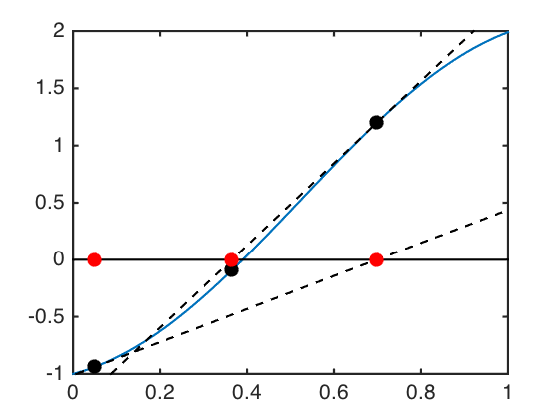

In [77]:
hold off
f = @(x) x-cos(3*x); df = @(x) 1+3*sin(3*x);
x = linspace(0,1,100);
plot(x,f(x)); hold on; plot(x,0*x,'k');
axis([0 1 -1 2])
p = .05;
plot(p,0,'ro','MarkerFaceColor','r'); plot(p,f(p),'ko','MarkerFaceColor','k');
for i = 1:2
    l = @(x) f(p) + df(p)*(x-p);
    plot(x,l(x),'--k');
    p = p - f(p)/df(p);
    plot(p,f(p),'ko','MarkerFaceColor','k'); plot(p,0,'ro','MarkerFaceColor','r');
end